## Programavimo įvado pratybos

- Python komandoms prisiminti: ``https://www.w3schools.com/python/``
- Naudingos Powershell komandos:

    - `ls` - pažiūrėti katalogo turinį

    - `md` - sukurti naują katalogą

    - `cd` - pereiti į katalogą / iš katalogo

    - `ni p5.py` - sukuria naują bylą vardu `p5.py`

    - `python p5.py` - kompiliuoja Python programą

    - `python p5.py arg` - kompiliuoja Python programą pateikiant argumentus

# A1

Sukurkite numpy masyvą, kuriame būtų laiko vertės nuo `t=0` iki `t=15` sekundžių, kas `0.1` s.

Atspausdinkite masyvo dydį (`.size`).

Naudokite `np.arange()`.



In [2]:
import numpy as np

t = np.arange(0, 15.1, 0.1)
print(t.size)

150


# A2

Paprastas harmoninis osciliatorius aprašomas formule:

$x(t)=A \cdot cos(wt) $, kur

$A = 0.5\: m$ - amplitudė

$w = 2.0\: rad/s$ - kampinis dažnis


Pasinaudokite A1 užduotyje sukurtu laiko masyvu, ir apskaičiuokite osciliatoriaus padėtį kiekvienu laiko momentu.

Rezultatą atvaizduokite grafike (`fig, ax = plt.subplots()`).

Užuomina: naudokite `np.cos()`.

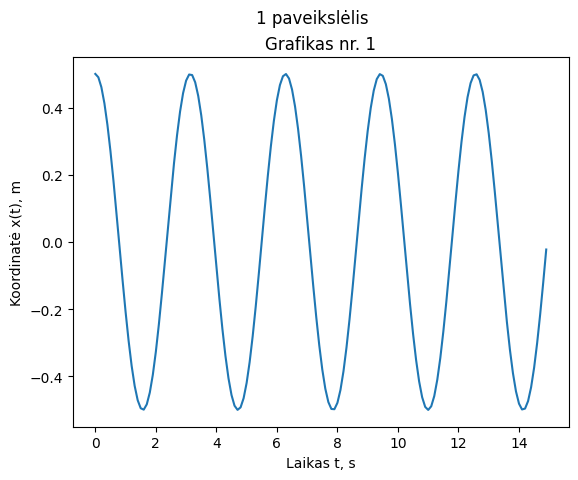

In [105]:
import matplotlib.pyplot as plt     #Įkeliu biblioteką

A = 0.5
w = 2
x = A * np.cos(w*t)

fig, ax = plt.subplots()
ax.plot(t, x)
fig.suptitle("1 paveikslėlis")                                                  #sukuria paveikslėlio pavadinimą
ax.set(title="Grafikas nr. 1", xlabel="Laikas t, s", ylabel="Koordinatė x(t), m")#sukuria ašių pavadinimus
plt.show()                                                                      #brėžia grafiką

# A3

Apskaičiuokite funkcijų $y_k = \sin(k\pi x)$, kai $k=1,\ldots, 5$, grafikus intervale $x \in [0,1]$.

Parašykite funkciją, kuriai pateikiame `x` taškų masyvą bei `k` reikšmę, o ji grąžina `y` taškų masyvą.

Atvaizduokite visas kreives viename grafike.

- `x` masyvui sukurti panaudokite `np.linspace()`.
- aprašykite funkciją
- sukurkite naują grafiką `fig, ax = ...`
- iteruodami `for` cikle visoms `k` reikšmėms nupieškite grafiką



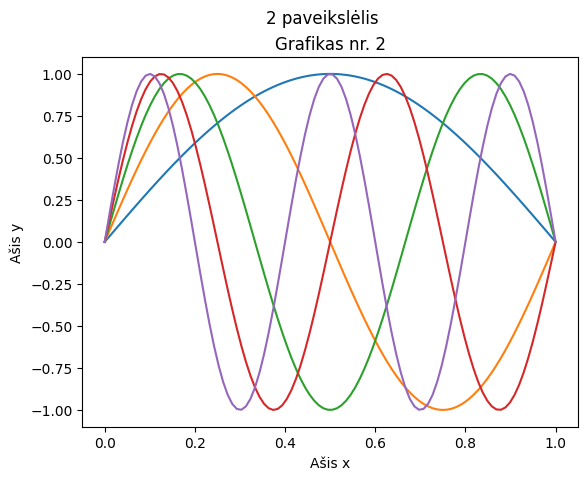

In [104]:
def y(x, k):                                                                    #aprašau funkciją
  y = np.sin(k*np.pi*x)                                                         #suskaičiuoja y
  return y

x = np.linspace(0, 1, 100)                                                      #sukuria 100 taškų x masyvą

fig, ax = plt.subplots()

for k in range(1, 6):                                                           #iteruoja per k
  ax.plot(x, y(x, k))
  fig.suptitle("2 paveikslėlis")                                                #sukuria paveikslėlio pavadinimą
  ax.set(title="Grafikas nr. 2", xlabel="Ašis x", ylabel="Ašis y")               #sukuria ašių pavadinimus
plt.show()                                                                      #brėžia grafiką


# A4

Atvaizduokite prieš tai užduotyje sukurtų grafikų sumą naujame grafike.

T.y. sudėkite visų osciliatorių (su skirtingomis `k` reikšmėmis `y` vertes).

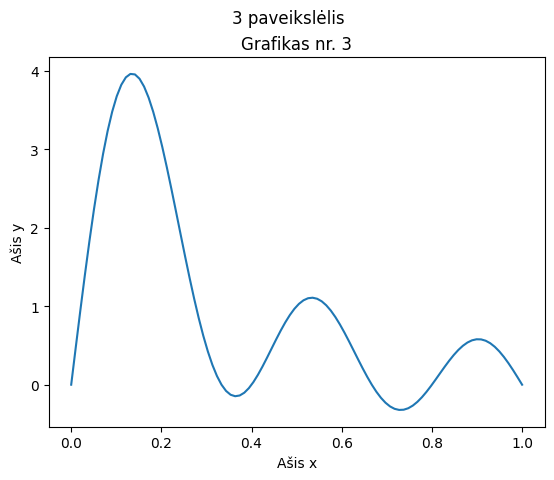

In [103]:
suma = np.empty(x.size)

for k in range(1, 6):                                                           #iteruoja per k
  suma = suma + y(x, k)                                                         #sudeda masyvus

fig, ax = plt.subplots()
ax.plot(x, suma)
fig.suptitle("3 paveikslėlis")                                                  #sukuria paveikslėlio pavadinimą
ax.set(title="Grafikas nr. 3", xlabel="Ašis x", ylabel="Ašis y")                 #sukuria ašių pavadinimus
plt.show()

# A5

`duomenys.csv` faile pateikti žvaigždžių parametrai - temperatūra, laisvojo kritimo pagreičio paviršiuje logaritmas, metalingumas ir amžius.

Nuskaitykite pateiktą `duomenys.csv` failą.

Pasinaudokite `np.genfromtxt()` komanda. Ši komanda stulpelius bando nuskaityti į `float` tipo kintamuosius. Pirmajame stulpelyje yra žvaigždžių pavadinimai, tad nurodykite `dtype=None`, tuomet bus bandoma "atspėti" kiekvieno stulpelio tipą atskirai.

Sudėkite stulpelius į numpy masyvus su atitinkamais pavadinimais (pasinaudokite stulpelių pavadinimais failo header'yje).

Atvaizduokite `scatter` tipo grafike: x ašyje Teff (antras stulpelis), y ašyje logg (trečias stulpelis). Jūs gausite [HR diagramos versiją - Kiel (Kylio) diagramą](https://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram) kurioje vaizduojamos žvaigždžių pozicijos.

Apverskite ašis pasinaudodami `ax.invert_xaxis()` funkcija (apsukite tiek x tiek y ašis).

Apipavidalinkite grafiką:
- ašių užrašai
- grafiko pavadinimas
- simbolių dydžiai



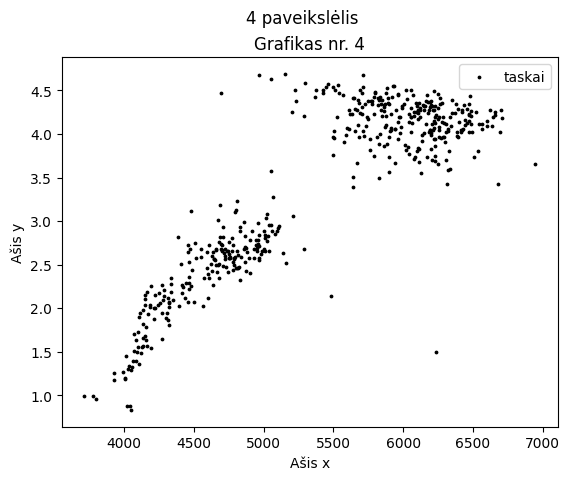

In [106]:
names, teff, logg, feh, age = np.genfromtxt("duomenys.csv", delimiter=",", skip_header=1, unpack= True, dtype = None, encoding="utf-8") #stulpeliais nuskaitomi duomenys
fig, ax = plt.subplots()
ax.scatter(teff, logg, color = "black", s = 3, label = "taskai")
ax.invert_xaxis
ax.invert_yaxis
ax.legend()
fig.suptitle("4 paveikslėlis")                                                  #sukuria paveikslėlio pavadinimą
ax.set(title="Grafikas nr. 4", xlabel="Ašis x", ylabel="Ašis y")                 #sukuria ašių pavadinimus
plt.show()

# A6

Laisvojo kritimo pagreičio žvaigždės paviršiuje logaritmas yra žvaigždės dydžio indikatorius (kuo didesnė žvaigždė, tuo paviršius toliau nuo masės centro, tuo pagreičio vertė bus mažesnė).

Žvaigždžių milžinių log$g$ yra mažesnis, negu nykštukių (pvz. tokių kaip Saulė).

Dažnai ta riba yra apie 3.4. Pasinaudokite numpy masyvų filtravimo (mask) galimybėmis.

Taškus kurių logg $<3.4$ atvaizduokite raudonai, likusius - `royalblue` spalva.

Užuomina: pabandykite tiek `masyvas[filtras]` tiek `masyvas[~filtras]`.

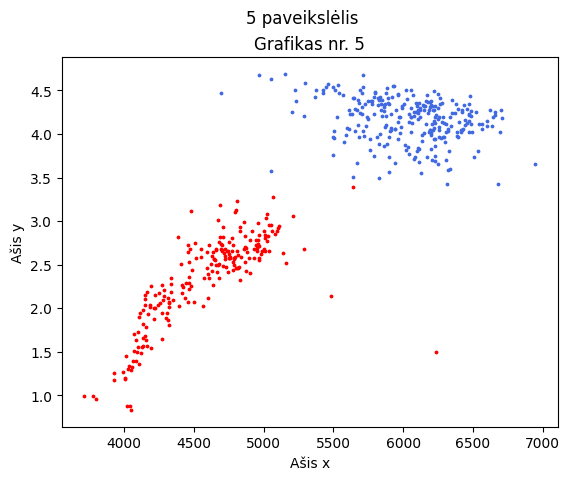

In [107]:
mask = logg < 3.4                                                               #nustatomas filtras

fig, ax = plt.subplots()
ax.scatter(teff[mask], logg[mask], color = "red", s=3)
ax.scatter(teff[~mask], logg[~mask], color = "royalblue", s=3)

ax.invert_xaxis
ax.invert_yaxis

fig.suptitle("5 paveikslėlis")                                                  #sukuria paveikslėlio pavadinimą
ax.set(title="Grafikas nr. 5", xlabel="Ašis x", ylabel="Ašis y")                 #sukuria ašių pavadinimus
plt.show()

# A7

Atspausdinkite atskirų grupių (nykštukių ir milžinių) statistiką:
- min max reikšmes
- vidurkio reikšmes
- standartinius nuokrypius

In [90]:
mask = logg < 3.4

nykstukiu_teff = teff[~mask]
nykstukiu_logg = logg[~mask]
milziniu_teff = teff[mask]
milziniu_logg = logg[mask]

print(f"Nykštukių statistika: mažiausia temperatūra bei log(g) {nykstukiu_teff.min()}, didžiausai temperatūra: {nykstukiu_teff.max()}, vidurkis {nykstukiu_teff.mean()}, standartinis nuokrypis {nykstukiu_teff.std()}")
print(f"Milžinių statistika: mažiausia temperatūra {milziniu_teff.min()}, didžiausai temperatūra: {milziniu_teff.max()}, vidurkis {milziniu_teff.mean()}, standartinis nuokrypis {milziniu_teff.std()}")

Nykštukių statistika: mažiausia temperatūra 4696, didžiausai temperatūra: 6947, vidurkis 6032.25, standartinis nuokrypis 354.2791407334385


# A8

Atvaizduokite A6 užduoties grafike Saulę (Teff = 5772, logg = 4.44) - geltonu žvaigždės simboliu juodais kraštais (`edgecolor`), padidinkite simbolį.

Taip pat atvaizduokite žvaigždę `TYC4421-1996-1`. Raskite ją duomenyse pasinaudodami `numpy` filtravimu.

TypeError: Axes.scatter() missing 1 required positional argument: 'y'

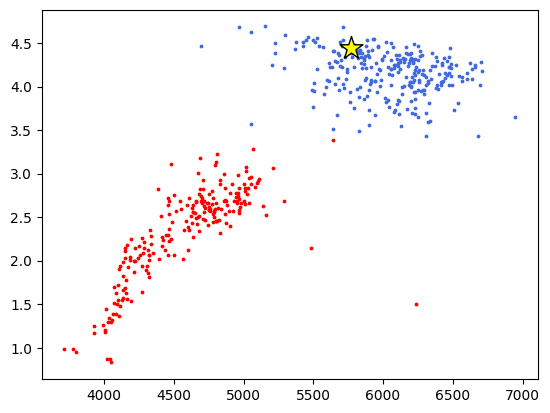

In [108]:
fig, ax = plt.subplots()
ax.scatter(teff[mask], logg[mask], color = "red", s=3)
ax.scatter(teff[~mask], logg[~mask], color = "royalblue", s=3)

ax.scatter(5772, 4.44, color = "yellow", marker = "*", edgecolor = "black", s=300)
ax.scatter(teff[names=="TYC4421-1996-1"], color = "green", marker = "*", edgecolor = "black", s=300)
fig.suptitle("6 paveikslėlis")                                                  #sukuria paveikslėlio pavadinimą
ax.set(title="Grafikas nr. 6", xlabel="Ašis x", ylabel="Ašis y")                 #sukuria ašių pavadinimus

ax.invert_xaxis
ax.invert_yaxis
plt.show()

# A9

Įrašykite filtruotus duomenis į du failus: `nykštukės.txt` ir `milžinės.txt`.

Nepamirškite stulpelių pavadinimų.

Panaudokite:

- `np.savetxt()`
- parametrą `fmt="%s"` - stulpeliai turi keletą skirtingų tipų (pirmasis stulpelis yra `string`, kiti `float`). numpy "megsta" kai viskas yra to paties tipo. Parametras `fmt="%s"` visus stulpelius suformatuoja/konvertuoja į `string` tipą.

In [93]:
np.savetxt('nykstukes.txt', np.column_stack((names[~mask], teff[~mask], logg[~mask], feh[~mask], age[~mask])), fmt = '%s')
np.savetxt('milzines.txt', np.column_stack((names[mask], teff[mask], logg[mask], feh[mask], age[mask])), fmt = '%s')

# A10

Pasinaudokite `numpy` atsitiktinių (random) skaičių generavimo galimybėmis.

Sugeneruokite keturis gausinius pasiskirstymus su ta pačia sigma, bet skirtingais vidurkiais bei verčių kiekiu.

$\sigma = 1$



1.   Mean = 0, n = 10
2.   Mean = 5, n= 100
3.  Mean = 10, n = 1000
4.  Mean = 15, n = 1000

Atvaizduokite visų keturių pasiskirstymų histogramas viename grafike.



[Text(0.5, 1.0, 'Grafikas nr. 7'),
 Text(0.5, 0, 'Ašis x'),
 Text(0, 0.5, 'Ašis y')]

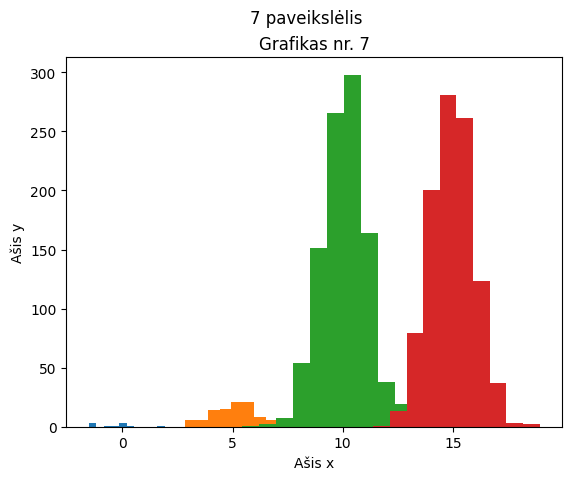

In [109]:
fig, ax = plt.subplots()

ax.hist(np.random.normal(0, 1, 10))
ax.hist(np.random.normal(5, 1, 100))
ax.hist(np.random.normal(10, 1, 1000))
ax.hist(np.random.normal(15, 1, 1000))

fig.suptitle("7 paveikslėlis")                                                  #sukuria paveikslėlio pavadinimą
ax.set(title="Grafikas nr. 7", xlabel="Ašis x", ylabel="Ašis y")                #sukuria ašių pavadinimus

# B1

Planetos orbita aplink Saulę supaprastintai gali būti aprašyta [orbitine lygtimi](https://en.wikipedia.org/wiki/Orbit_equation):

$r(\theta) = \frac{p\cdot {\rm au}}{1 + e\cdot \cos\theta}$

kur $\theta$ yra kampas nurodantis planetos vietą orbitoje,

$\rm au$ - astronominis vienetas (vidutinis Žemės atstumas iki Saulės),

$p$ - parametras aprašantis orbitos dydį (vidutinį atstumą iki Saulės),

$e$ - orbitos ekscentricitetas (eliptiškumas).

Šioje užduotyje turite atvaizduoti vidinių Saulės sistemos planetų orbitas. Laikykite kad:


\begin{array}{lllllll}
& Marsas & Žemė & Venera & Merkurijus \\
p & 1.6 & 1.0 & 0.723 & 0.4 \\
e & 0.093 & 0.017 & 0.007 & 0.205
\end{array}


Atvaizduokite planetų orbitas kai $0\le \theta \le 2 \pi$.:

- Naudokite $x=r\sin(\theta)$ ir $y=r\cos(\theta)$.

- Ant kiekvinos orbitos nupieškite planetą. Orbitų centre nupieškite geltoną Saulę.


Šioje užduotyje turite gauti tokį [grafiką](https://arnas.tfai.vu.lt/examples/Orbits.png):

Užuominos:

- Astronominis vienetas (au) lygus 1.495978707 x $10^{11}$ m

- Planetų duomenis sudėkite į žodyną `planets={"Marsas":[1.6,0.093], "Žemė":...}`. Tada iteruodami per žodyną apskaičiuokite ir nupieškite kiekvienos planetos orbitą.

- Nustatykite [`plt.axis("equal")`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axis.html).
